In [28]:
import numpy as np
import scipy
from scipy.optimize import nnls
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank

In [29]:
A = np.genfromtxt('A.txt', delimiter=',')
b = np.genfromtxt('b.txt', delimiter=',')

In [30]:
matrix_rank(A)

20

In [31]:
A.shape

(30, 20)

In [32]:
b.shape

(30,)

In [136]:
x_star = np.linalg.inv(A.T @ A) @ A.T @ b

In [58]:
x

array([-0.01574095,  0.12101415,  0.04518362,  0.04764731, -0.1623104 ,
        0.00908704, -0.0947885 , -0.15907534,  0.10031668,  0.09054754,
        0.11128148,  0.1171073 , -0.01742716,  0.16248451,  0.06777838,
        0.05863189, -0.06047807,  0.07110943,  0.0825872 ,  0.04114662])

In [39]:
#x = np.linalg.pinv(A) @ b
y_pred = A@x
y_pred_2 = A@x_opt

In [36]:
y_pred

array([ 0.1507625 , -0.23451095,  0.72062986, -0.21826126,  0.53754694,
        0.52308233,  0.18353161, -0.0460062 ,  1.34053111,  0.10824575,
        1.01838517, -0.01840974, -0.60426614,  0.12283326,  0.27565264,
        0.66601046,  0.12414499, -0.53813305, -0.66476407,  0.23363656,
       -0.04117583, -0.14070737, -0.56264793, -0.57302889,  0.67878603,
        0.4979169 , -0.48122366,  0.46366611,  0.07435518,  0.79565878])

In [49]:
0.5 * np.linalg.norm(A@x - b)**2

4.492116978208482

In [56]:
grad_f = A.T @ (A @ x_opt - b)

print(grad_f)

[-4.31767729e-16 -2.35226098e-15  2.01835939e-15  2.48882851e-15
 -8.20057915e-15 -2.02746452e-15  3.10249207e-15 -2.79409506e-15
  1.47278218e-15 -9.29041095e-15  2.29111627e-15  8.16954282e-15
  4.41178655e-17 -6.55733346e-16 -8.91776135e-16 -1.33650559e-15
 -2.34820004e-15 -2.54285979e-16  2.93798372e-15  1.25990972e-15]


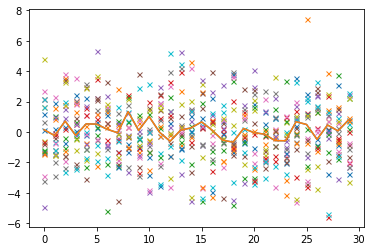

In [43]:
for i in range(20):
    _ = plt.plot(
        np.arange(30)
        , A[:,i]
        , 'x'
        , label='Original data'
        ,markersize=5
    )

plt.plot(np.arange(30), y_pred)
plt.plot(np.arange(30), y_pred_2)
plt.show()

In [92]:
def grad(x):
    return A.T @ (A @ x - b)

def objective(x):
    return 0.5 * np.linalg.norm(A @ x - b)**2

x = np.zeros(A.shape[1])

# fixed alpha
for i in range(1000):
    grad_f = grad(x)
    d = -grad_f
    alpha_fixed = 1 / np.linalg.eigvalsh(A.T @ A)[-1]
    _x_ = x + alpha_fixed * d
    if np.linalg.norm(_x_ - x) < 1e-10:
        break
    x = _x_
    
print(f'iterations: {i} objective value fn: {objective(x)}')
print(f'Solution: {x}')

iterations: 999 objective value fn: 4.492116978211298
Solution: [-0.01574073  0.12101414  0.04518364  0.047647   -0.16231034  0.00908697
 -0.09478803 -0.15907521  0.10031718  0.09054769  0.1112813   0.1171071
 -0.01742745  0.16248403  0.0677786   0.05863167 -0.06047793  0.07110946
  0.08258721  0.04114674]


In [121]:
from scipy.optimize import line_search

x = np.zeros(A.shape[1])
for i in range(1):
    g = grad(x)
    d = -grad_f
    exact_line_search = np.linalg.norm(g)**2 / (g.T @ A @ g)
    #print(g.shape)
    #print((g @ A.T).shape)
    _x_ = x + exact_line_search * d
    if np.linalg.norm(_x_ - x) < 1e-10:
        break
    x = _x_
    
print(f'iterations: {i} objective value fn: {objective(x)}')
print(f'Solution: {x}')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 30 is different from 20)

/var/folders/t6/33f7q3bx3xs8xgmhs2zpyyhc0000gn/T/ipykernel_54933/3395583139.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  rel_error = np.linalg.norm(_x_ - x) / np.linalg.norm(x)


iterations: 818 objective value fn: 4.492116978208487
Solution: [-0.01574094  0.12101415  0.04518362  0.0476473  -0.1623104   0.00908704
 -0.09478848 -0.15907534  0.1003167   0.09054755  0.11128148  0.11710729
 -0.01742717  0.1624845   0.06777839  0.05863188 -0.06047807  0.07110943
  0.0825872   0.04114663]


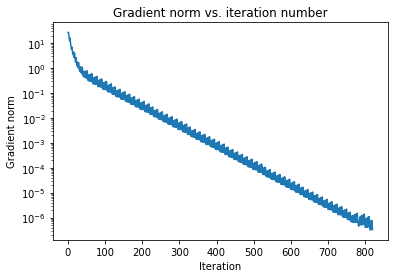

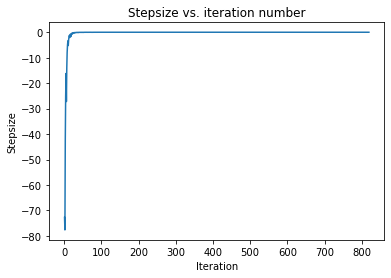

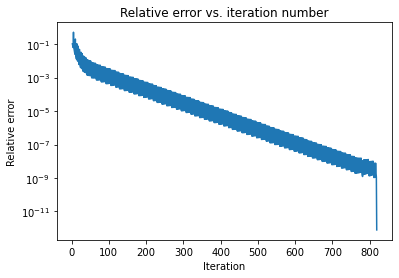

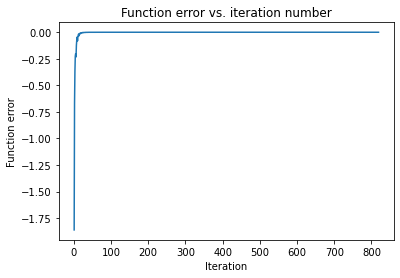

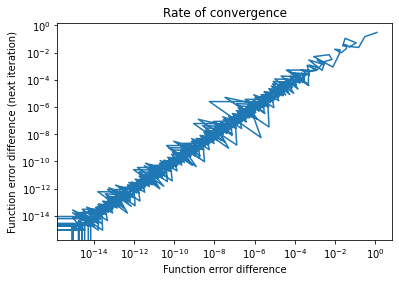

In [151]:
gamma = 0.1
delta = 0.1
x = np.zeros(A.shape[1])
grad_data = []
rel_errors = []
func_errors = []
stepsizes = []
func_error_diffs = []

for i in range(1000):
    g = grad(x)
    grad_data.append(np.linalg.norm(g))
    d = -g
    alpha = 1
    
    expected_decrease = delta * alpha * g.T @ d
    stepsizes.append(expected_decrease)
    
    while objective(x + alpha * d) > objective(x) + expected_decrease:
        alpha *= gamma
        expected_decrease *= gamma

    _x_ = x + alpha * d
    rel_error = np.linalg.norm(_x_ - x) / np.linalg.norm(x)
    rel_errors.append(rel_error)
    
#     if np.linalg.norm(x_star) < 1e-4:
#         break

    func_error = 0.5 * np.linalg.norm(A @ _x_ - b)**2 - 0.5 * np.linalg.norm(A @ x - b)**2
    func_errors.append(func_error)
    
    if i > 0:
        func_error_diff = np.abs(func_errors[-1] - func_errors[-2])
        func_error_diffs.append(func_error_diff)
        
    if np.linalg.norm(_x_ - x) < 1e-10:
        break
        
    x = _x_
    
print(f'iterations: {i} objective value fn: {objective(x)}')
print(f'Solution: {x}')

plt.semilogy(range(1, i+2), grad_data)
plt.xlabel('Iteration')
plt.ylabel('Gradient norm')
plt.title('Gradient norm vs. iteration number')
plt.show()

# Plot stepsize vs. iteration number
plt.plot(range(1, i+2), stepsizes)
plt.xlabel('Iteration')
plt.ylabel('Stepsize')
plt.title('Stepsize vs. iteration number')
plt.show()

# Plot relative error vs. iteration number
plt.semilogy(range(1, i+2), rel_errors)
plt.xlabel('Iteration')
plt.ylabel('Relative error')
plt.title('Relative error vs. iteration number')
plt.show()

# Plot function error vs. iteration number
plt.plot(range(1, i+2), func_errors)
plt.xlabel('Iteration')
plt.ylabel('Function error')
plt.title('Function error vs. iteration number')
plt.show()

# Plot function error difference vs. function error
plt.loglog(func_error_diffs[:-1], func_error_diffs[1:])
plt.xlabel('Function error difference')
plt.ylabel('Function error difference (next iteration)')
plt.title('Rate of convergence')
plt.show()

In [ ]:
\section*{Question 3}
a)First we calculate the gradient of the problem we intend to minimize which is the vector of the partial derivatives with respect to their variable: \\ 
$
f(x,y) = (y − x^2)^2 + \delta(1 − x)^2 \\ 
\frac{d}{dx} = -2x(y-x^2) - 2\delta(1-x)\\ 
\frac{d}{dy} = 2(y - x^2)
$

2) Determine stepsize the stepsize methods
1) amirijo: 
2) exact line search
3) decreasing c/sqrt(k)

3) Update the estimate
4) Check for convergence

Assuming the matrix A is full rank then the solution is:
$

x^* = (A^T A)^{-1} A^Tb
$

b) 

$f(x-t\nabla f(x)) \leq f(x) + \alpha t \nabla f(x)^T \nabla f(x)$

 $k$: $k \leftarrow k+1$

 $|\nabla f(x^{(k)})| \leq \epsilon$


\section*{References} 
1. https://en.wikipedia.org/wiki/Convex_combination
3.\ desmos.com \\
4.\ wolframalpha.com \\
5. https://medium.com/@tommyjoelhu/minimizing-the-sum-of-squared-deviations-with-high-school-algebra-7dcef3814c9b \\ 
6. https://www.youtube.com/watch?v=BBlDWNTimoA
6. https://www.eecis.udel.edu/~xwu/class/ELEG667/Lecture2.pdf
7. convexity handout 
8. https://math.stackexchange.com/questions/2792390/derivative-of-euclidean-norm-l2-norm \\
9. https://www-users.cse.umn.edu/~rejto/4242/4242_2final_sol3.pdf \\
10. https://sites.millersville.edu/rumble/Math.422/quadform.pdf \\ 
11. https://www.youtube.com/watch?v=81pnTdbO2Xk \\
12. https://www.youtube.com/watch?v=Dxm7KoMXW0A \\
